In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import lifelines

In [109]:
df = pd.read_csv('telco.csv')
df

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,No
996,997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,No
997,998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,No
998,999,Zone 3,70,49,Unmarried,18,87,High school degree,No,Female,Yes,No,Yes,Plus service,No


In [110]:
df.set_index('ID', inplace=True)

In [111]:
df['churn'] = pd.Series(np.where(df.churn.values == "Yes", 1, 0), df.index)

In [112]:
cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat'] 
survival_df = pd.get_dummies(df, columns = cols, prefix = cols, drop_first = True)
survival_df["tenure"] = np.where(survival_df["tenure"] == 0, 0.000000001, survival_df["tenure"])
survival_df.head()

,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
ID,,,,,,,,,,,,,,,,,,,,
1,13.0,44,9,64,1,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,11.0,33,7,136,1,False,True,False,False,False,True,False,False,True,True,False,True,False,False,True
3,68.0,52,24,116,0,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,33.0,33,12,33,1,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
5,23.0,30,9,30,0,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False


### Building AFT Models

In [113]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter,\
                      WeibullAFTFitter,\
                      LogNormalAFTFitter,\
                      LogLogisticAFTFitter

In [114]:
log_norm = LogNormalAFTFitter()
weibull = WeibullAFTFitter()
log_logistic = LogLogisticAFTFitter()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-30 17:53:05 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

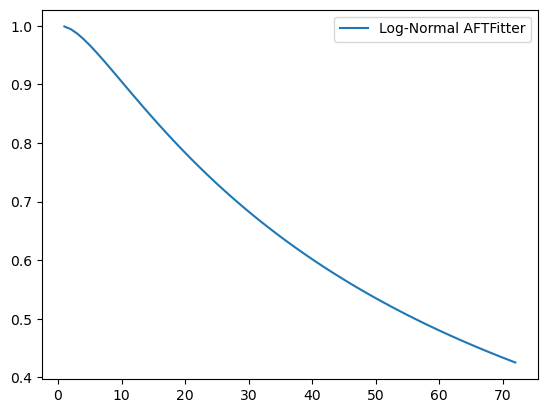

In [115]:
log_norm.fit(survival_df, duration_col = "tenure", event_col="churn")
log_norm.print_summary()
plt.plot(log_norm.predict_survival_function(survival_df.loc[1]), label="Log-Normal AFTFitter")
plt.legend()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2023-11-30 17:53:07 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service           

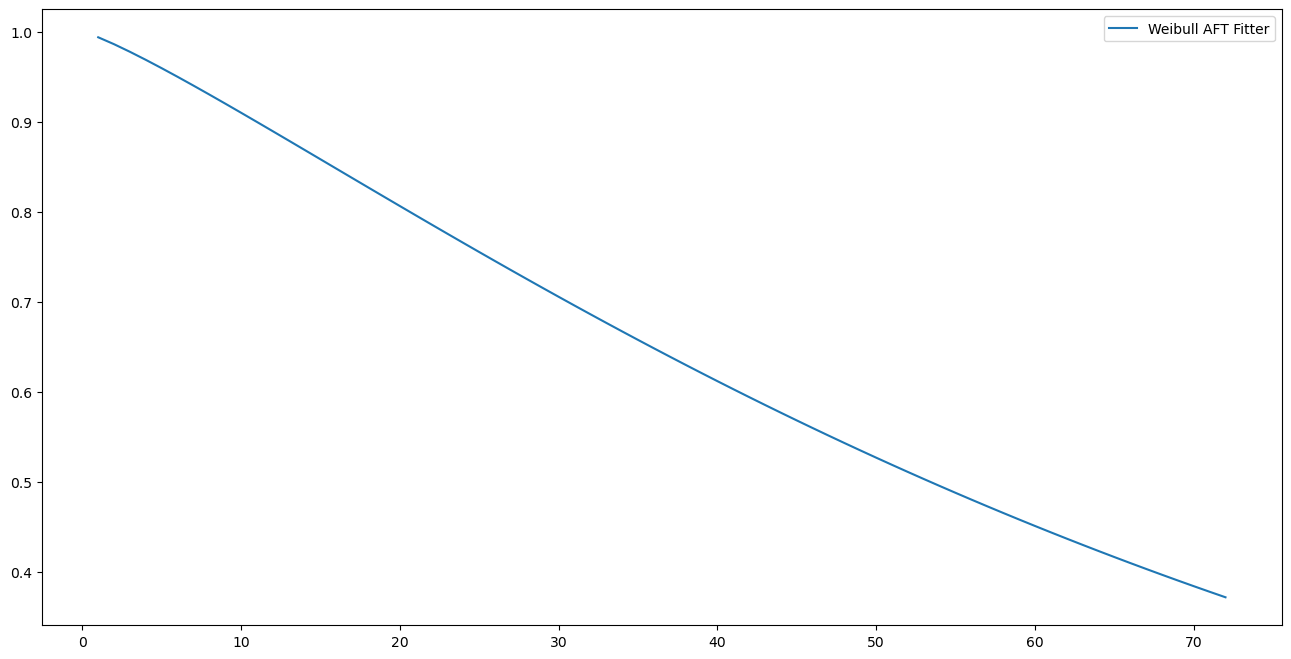

In [116]:
survival_df["tenure"] = np.where(survival_df["tenure"] == 0, 0.000000001, survival_df["tenure"])
fig, ax = plt.subplots(figsize=(16, 8))
weibull.fit(survival_df, duration_col="tenure", event_col="churn")
weibull.print_summary()
plt.plot(weibull.predict_survival_function(survival_df.loc[1]), label="Weibull AFT Fitter")
plt.legend()

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2023-11-30 17:53:07 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005    

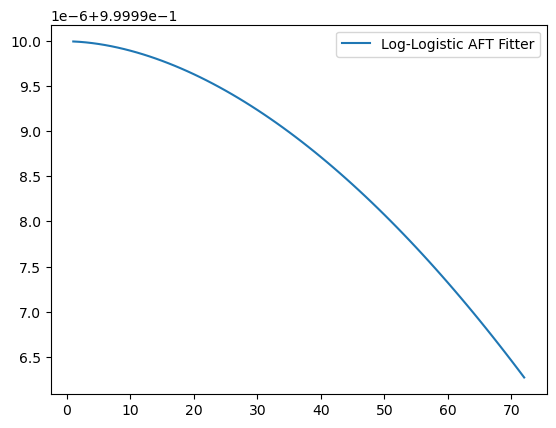

In [117]:
log_logistic.fit(survival_df, duration_col="tenure", event_col="churn")
log_logistic.print_summary()
plt.plot(llf_aft.predict_survival_function(survival_df.loc[1]), label="Log-Logistic AFT Fitter")
plt.legend()

When comparing AIC scoress the best one is the Log-Normal as it has the lowest AIC score. Apart from AIC scores and plots, other crucial factors influence model selection. Model complexity, denoted by the number of parameters, is one such factor. Log-Normal and Log-Logistic models have three parameters each, while Weibull has two.
Another consideration is the hazard rate. For instance, choosing the Weibull model over the exponential model is appropriate if the data displays a non-constant hazard rate. The Weibull model can effectively capture both increasing and decreasing hazard rates.

In [118]:
#We need to keep the significant columns which are the following (if we tak 95%)
survival_df = survival_df[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]

In [119]:
survival_df

,tenure,churn,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,internet_Yes,marital_Unmarried,voice_Yes
ID,,,,,,,,,,
1,13.0,1,9,44,False,False,False,False,False,False
2,11.0,1,7,33,False,False,True,False,False,True
3,68.0,0,24,52,False,True,False,False,False,False
4,33.0,1,12,33,False,False,False,False,True,False
5,23.0,0,9,30,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
996,10.0,0,0,39,False,False,False,False,True,False
997,7.0,0,2,34,False,False,False,False,True,False
998,67.0,0,40,59,False,False,True,True,True,True


In [120]:
#as we have chosen log-normal we will keep it as our final model
ln = log_norm.fit(survival_df, duration_col='tenure', event_col='churn')
ln.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-30 17:53:10 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.79
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

# CLV Analysis

In [121]:
clv = ln.predict_survival_function(survival_df)
clv

ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.595597,0.612735,0.941530,0.380751,0.681995,0.740246,0.324647,0.244165,0.887519,0.906396,...,0.655478,0.780519,0.588828,0.975035,0.631761,0.300058,0.274774,0.864845,0.727282,0.537869
69.0,0.591329,0.608517,0.940235,0.376567,0.678061,0.736667,0.320700,0.240726,0.885403,0.904544,...,0.651418,0.777252,0.584544,0.974386,0.627607,0.296244,0.271117,0.862440,0.723614,0.533498
70.0,0.587113,0.604347,0.938937,0.372457,0.674164,0.733115,0.316829,0.237363,0.883290,0.902692,...,0.647400,0.774006,0.580311,0.973732,0.623498,0.292507,0.267537,0.860042,0.719976,0.529186
71.0,0.582946,0.600224,0.937635,0.368420,0.670304,0.729590,0.313033,0.234073,0.881180,0.900841,...,0.643423,0.770779,0.576130,0.973074,0.619433,0.288845,0.264031,0.857649,0.716367,0.524932


In [122]:
m = 1200
s = range(1,len(clv.columns)+1)
r = 0.1

In [123]:
for i in s:
    clv.loc[:, i] = clv.loc[:, i]/((1+r/12)**(s[i-1]-1))

In [124]:
clv["CLV"] = m * clv.sum(axis = 1)
clv

ID,1,2,3,4,5,6,7,8,9,10,...,992,993,994,995,996,997,998,999,1000,CLV
1.0,0.999688,0.991473,0.983538,0.973446,0.967224,0.959292,0.948364,0.937476,0.935760,0.928029,...,0.000268,0.000266,0.000264,0.000261,0.000258,0.000256,0.000255,0.000253,0.000251,144794.863464
2.0,0.998129,0.990127,0.983528,0.966343,0.966505,0.958893,0.938278,0.920203,0.935715,0.927999,...,0.000268,0.000265,0.000264,0.000261,0.000255,0.000252,0.000255,0.000253,0.000250,143802.666892
3.0,0.995250,0.987601,0.983496,0.955633,0.965062,0.958042,0.923907,0.897709,0.935595,0.927920,...,0.000268,0.000265,0.000264,0.000261,0.000251,0.000247,0.000255,0.000253,0.000249,142502.334741
4.0,0.991268,0.984066,0.983434,0.942708,0.962946,0.956739,0.907212,0.873104,0.935385,0.927775,...,0.000268,0.000263,0.000264,0.000260,0.000245,0.000241,0.000255,0.000252,0.000248,141049.849779
5.0,0.986400,0.979710,0.983338,0.928455,0.960245,0.955022,0.889321,0.847901,0.935077,0.927560,...,0.000267,0.000262,0.000264,0.000259,0.000240,0.000235,0.000255,0.000252,0.000246,139524.414117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.595597,0.607672,0.926032,0.371388,0.659727,0.710159,0.308878,0.230385,0.830510,0.841165,...,0.000209,0.000157,0.000257,0.000165,0.000078,0.000071,0.000221,0.000184,0.000135,82587.366641
69.0,0.591329,0.603488,0.924758,0.367307,0.655922,0.706725,0.305122,0.227141,0.828530,0.839446,...,0.000208,0.000155,0.000257,0.000164,0.000077,0.000070,0.000220,0.000183,0.000134,82098.768754
70.0,0.587113,0.599352,0.923481,0.363299,0.652153,0.703318,0.301440,0.223967,0.826553,0.837727,...,0.000208,0.000154,0.000257,0.000163,0.000076,0.000069,0.000219,0.000182,0.000133,81616.712506
71.0,0.582946,0.595263,0.922201,0.359361,0.648419,0.699936,0.297828,0.220863,0.824578,0.836009,...,0.000207,0.000153,0.000257,0.000162,0.000075,0.000068,0.000219,0.000181,0.000132,81141.051875


In [125]:
df["CLV"] = clv.CLV
df

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
ID,,,,,,,,,,,,,,,
1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,1,144794.863464
2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,1,143802.666892
3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,0,142502.334741
4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,1,141049.849779
5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,0,139524.414117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,0,NaN
997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,0,NaN
998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,0,NaN


In [126]:
#Tjose are the customers that are more probable to stay with the company. 

# #Exploring CLV with Different Segmetns

C:\Users\SM188JW\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


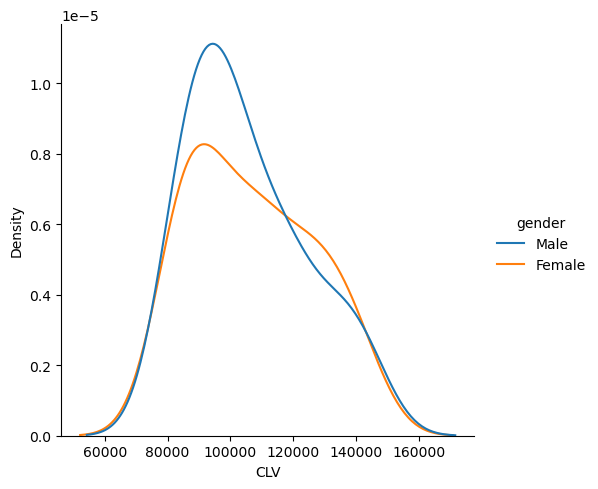

In [127]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'gender')

C:\Users\SM188JW\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


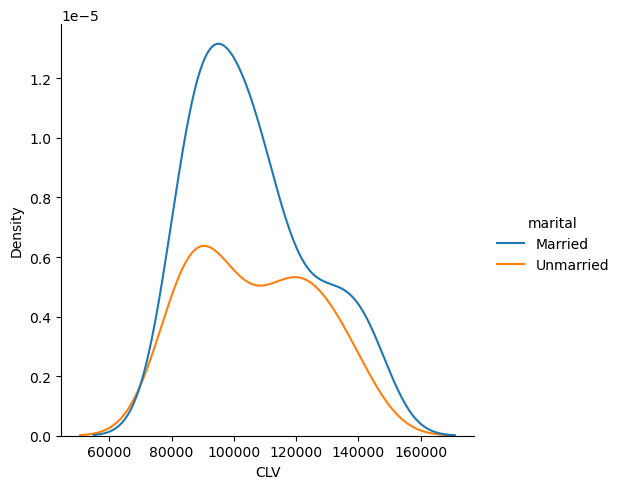

In [128]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'marital')

C:\Users\SM188JW\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


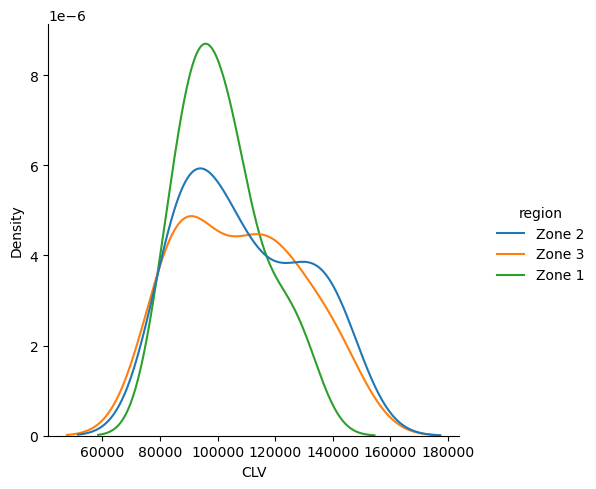

In [129]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'region')

C:\Users\SM188JW\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


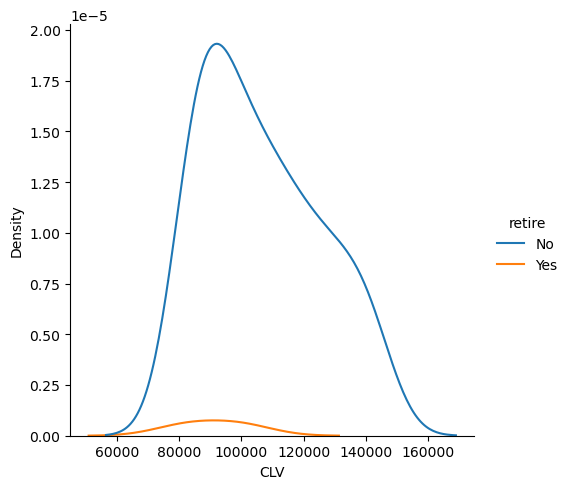

In [130]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'retire')

C:\Users\SM188JW\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


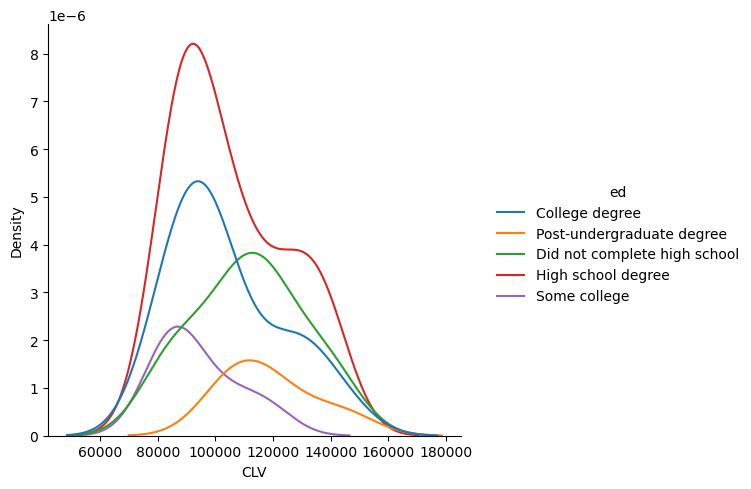

In [131]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'ed')

In [132]:
print(df.groupby("gender")[["CLV"]].mean())
print(df.groupby("marital")[["CLV"]].mean())
print(df.groupby("region")[["CLV"]].mean())
print(df.groupby("retire")[["CLV"]].mean())
print(df.groupby("ed")[["CLV"]].mean())

                  CLV
gender               
Female  106951.214984
Male    105386.496158
                     CLV
marital                 
Married    105839.565793
Unmarried  106601.766769
                  CLV
region               
Zone 1  101365.366401
Zone 2  109101.089772
Zone 3  107857.918502
                  CLV
retire               
No      106553.235523
Yes      91150.838424
                                        CLV
ed                                         
College degree                103762.641684
Did not complete high school  111519.771143
High school degree            105094.803845
Post-undergraduate degree     118688.618315
Some college                   94067.741127


# #Findings

Female customers have a slightly higher average CLV (45058.77) compared to male customers (44404.89).
However, the difference is not substantial, and further investigation may be needed to determine if this difference is statistically significant.

Married individuals exhibit a slightly lower average CLV (44592.81) compared to unmarried individuals (44915.09).
Similar to gender, the difference is relatively small, and additional analysis may be necessary for conclusive insights.

Customers in Zone 2 have the highest average CLV (45944.18), followed by Zone 3 (45429.24), and then Zone 1 (42746.11).
The regional differences in CLV suggest that the geographic location may play a role in customer value.

Non-retired customers (No) have a higher average CLV (44892.12) compared to retired customers (Yes) with a lower CLV (38467.67).
This could imply that non-retired individuals contribute more to CLV, but further analysis is required to validate this observation.

Customers with a post-undergraduate degree have the highest average CLV (49950.70), followed by those who did not complete high school (46966.86), high school degree holders (44284.59), and college degree holders (43724.25).
Education level seems to be positively correlated with CLV, with higher education associated with higher CLV.

There is a negative correlation between CLV and AFT. This implies that higher CLV is associated with a lower risk of churn. In other words, customers with higher CLV are less likely to churn.

If we want to interpret the coefficients we will say: 
Positive coefficients in AFT models indicate that an increase in the corresponding variable extends the expected customer lifetime.
Negative coefficients suggest that an increase in the variable decreases the expected customer lifetime.
The magnitude of coefficients signifies the strength of the effect of each variable on customer lifetime.

Additionally, the most valuable segments are those providing the highest average CLV to the company.
Retired individuals and those who did not complete high school have the highest average CLV. This may be connected to potential factors such as the demands of more educated or younger individuals.

For customer retention I would suggest to ongoing education and resources to customers, showcasing the value of your products or services. This can enhance customer satisfaction and loyalty. Additionally, I will suggest to implement predictive analytics to anticipate customer needs and behaviors. This can help in proactively addressing issues and offering targeted solutions before customers consider churning.